In [6]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.impute import SimpleImputer

In [16]:
data = pd.read_csv("C:/Users/91897/OneDrive/Desktop/Datasets/Titanic-Dataset.csv")

In [18]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
list(data)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
data.shape

(891, 12)

In [28]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [30]:
data.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [32]:
data1 = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [34]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [36]:
data1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [38]:
data1['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<AxesSubplot:ylabel='Age'>

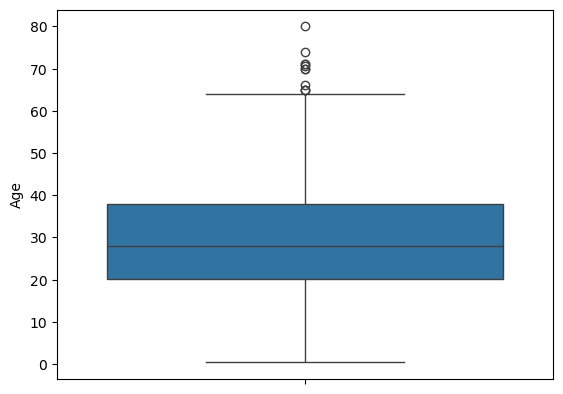

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data1.Age)

In [44]:
data1['Age'] = data1['Age'].mask(data1['Age']>60,60)

(array([ 47.,  22.,  70., 138., 132., 110.,  66.,  49.,  38.,  42.]),
 array([ 0.42 ,  6.378, 12.336, 18.294, 24.252, 30.21 , 36.168, 42.126,
        48.084, 54.042, 60.   ]),
 <BarContainer object of 10 artists>)

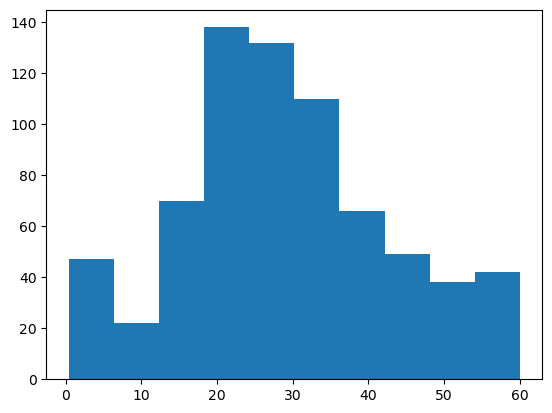

In [46]:
plt.hist(data1['Age'])

In [48]:
data1['Sex'] = data1['Sex'].map({'male':1,'female':0})

In [50]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [52]:
data1['Embarked'] = data1['Embarked'].map({'S':1,'C':2,'Q':3})

In [54]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1.0
887,1,1,0,19.0,0,0,30.0000,1.0
888,0,3,0,NaN,1,2,23.4500,1.0
889,1,1,1,26.0,0,0,30.0000,2.0


In [56]:
data1['Embarked'] = data1['Embarked'].map({1:'one',2:'two',3:'three'})

In [58]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,one
1,1,1,0,38.0,1,0,71.2833,two
2,1,3,0,26.0,0,0,7.9250,one
3,1,1,0,35.0,1,0,53.1000,one
4,0,3,1,35.0,0,0,8.0500,one
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,one
887,1,1,0,19.0,0,0,30.0000,one
888,0,3,0,NaN,1,2,23.4500,one
889,1,1,1,26.0,0,0,30.0000,two


In [60]:
data1.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,one
1,1,1,0,38.0,1,0,71.2833,two
2,1,3,0,26.0,0,0,7.9250,one
3,1,1,0,35.0,1,0,53.1000,one
4,0,3,1,35.0,0,0,8.0500,one


In [62]:
data1['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [64]:
data1['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [66]:
data1['Parch'] = data1['Parch'].map({0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six'})

In [68]:
data1['Pclass'] = data1['Pclass'].map({0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',8:'eight'})

In [70]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,three,1,22.0,1,zero,7.2500,one
1,1,one,0,38.0,1,zero,71.2833,two
2,1,three,0,26.0,0,zero,7.9250,one
3,1,one,0,35.0,1,zero,53.1000,one
4,0,three,1,35.0,0,zero,8.0500,one
...,...,...,...,...,...,...,...,...
886,0,two,1,27.0,0,zero,13.0000,one
887,1,one,0,19.0,0,zero,30.0000,one
888,0,three,0,NaN,1,two,23.4500,one
889,1,one,1,26.0,0,zero,30.0000,two


In [72]:
data1 = pd.get_dummies(data1)

In [74]:
data1.shape

(891, 18)

In [76]:
data1

,Survived,Sex,Age,SibSp,Fare,Pclass_one,Pclass_three,Pclass_two,Parch_five,Parch_four,Parch_one,Parch_six,Parch_three,Parch_two,Parch_zero,Embarked_one,Embarked_three,Embarked_two
0,0,1,22.0,1,7.2500,0,1,0,0,0,0,0,0,0,1,1,0,0
1,1,0,38.0,1,71.2833,1,0,0,0,0,0,0,0,0,1,0,0,1
2,1,0,26.0,0,7.9250,0,1,0,0,0,0,0,0,0,1,1,0,0
3,1,0,35.0,1,53.1000,1,0,0,0,0,0,0,0,0,1,1,0,0
4,0,1,35.0,0,8.0500,0,1,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,13.0000,0,0,1,0,0,0,0,0,0,1,1,0,0
887,1,0,19.0,0,30.0000,1,0,0,0,0,0,0,0,0,1,1,0,0
888,0,0,NaN,1,23.4500,0,1,0,0,0,0,0,0,1,0,1,0,0
889,1,1,26.0,0,30.0000,1,0,0,0,0,0,0,0,0,1,0,0,1


In [78]:
y = data1['Survived']
X = data1.drop('Survived',axis = 1)

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=10)

In [82]:
X_train.shape

(534, 17)

In [84]:
y_train.shape

(534,)

In [86]:
X_train.head(7)

,Sex,Age,SibSp,Fare,Pclass_one,Pclass_three,Pclass_two,Parch_five,Parch_four,Parch_one,Parch_six,Parch_three,Parch_two,Parch_zero,Embarked_one,Embarked_three,Embarked_two
105,1,28.0,0,7.8958,0,1,0,0,0,0,0,0,0,1,1,0,0
485,0,NaN,3,25.4667,0,1,0,0,0,1,0,0,0,0,1,0,0
721,1,17.0,1,7.0542,0,1,0,0,0,0,0,0,0,1,1,0,0
635,0,28.0,0,13.0000,0,0,1,0,0,0,0,0,0,1,1,0,0
859,1,NaN,0,7.2292,0,1,0,0,0,0,0,0,0,1,0,0,1
91,1,20.0,0,7.8542,0,1,0,0,0,0,0,0,0,1,1,0,0
443,0,28.0,0,13.0000,0,0,1,0,0,0,0,0,0,1,1,0,0


In [102]:
age = SimpleImputer(strategy='median')
data['Age'] = age.fit_transform(data[['Age']])

In [104]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64